In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Sequentialfeatureselection import backward_fs, forward_fs
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('fraud_oracle.csv')

In [4]:
df.shape

(15420, 33)

In [5]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [7]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


so we have 15420 data , 32 features and 1 target FraudFound_P

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [9]:
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(df.drop(['FraudFound_P'], axis=1), df['FraudFound_P'], train_size = 0.7, random_state=42)

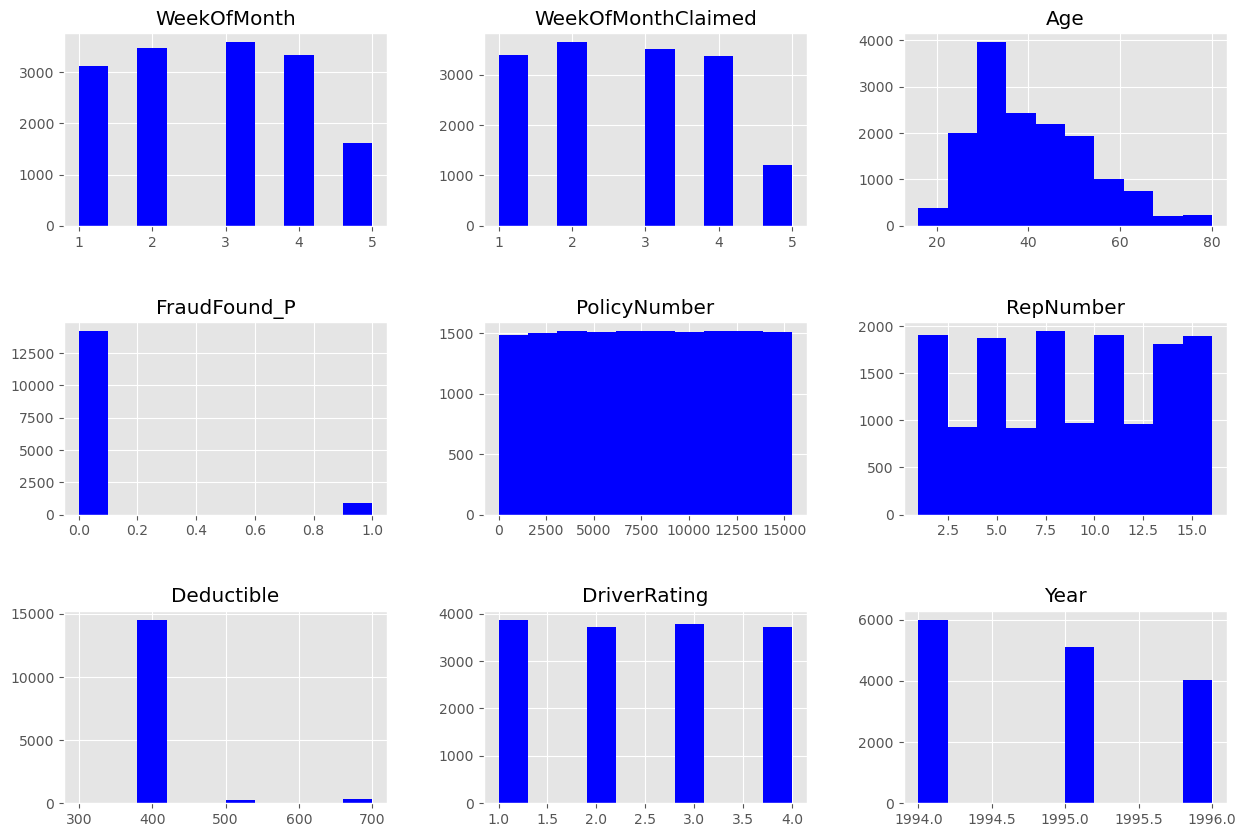

In [58]:
df.hist(figsize=(15,10), color = 'blue')
plt.subplots_adjust(hspace=0.5);

In [59]:
df = df[df['Age']>15]

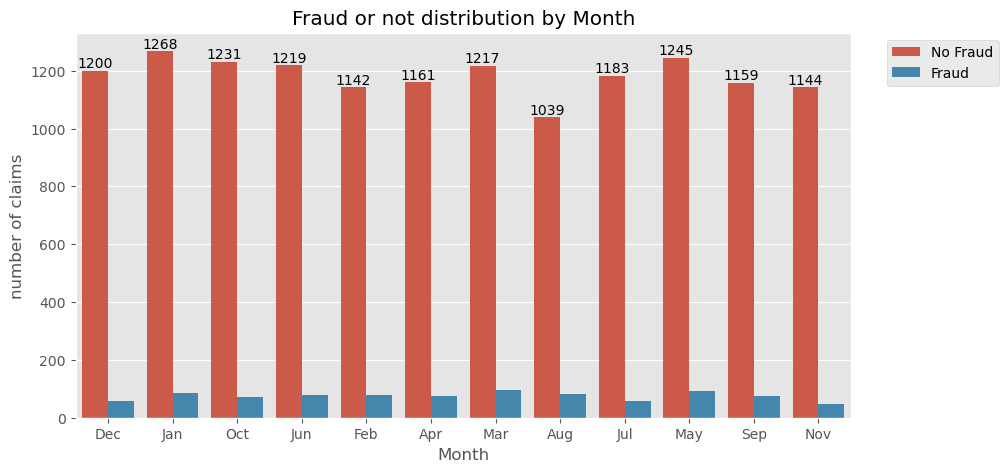

In [60]:
plt.figure(figsize=(10, 5))
labels = ['No Fraud', 'Fraud']
fig = sns.countplot(x="Month", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by Month')

plt.ylabel('number of claims')
plt.show()

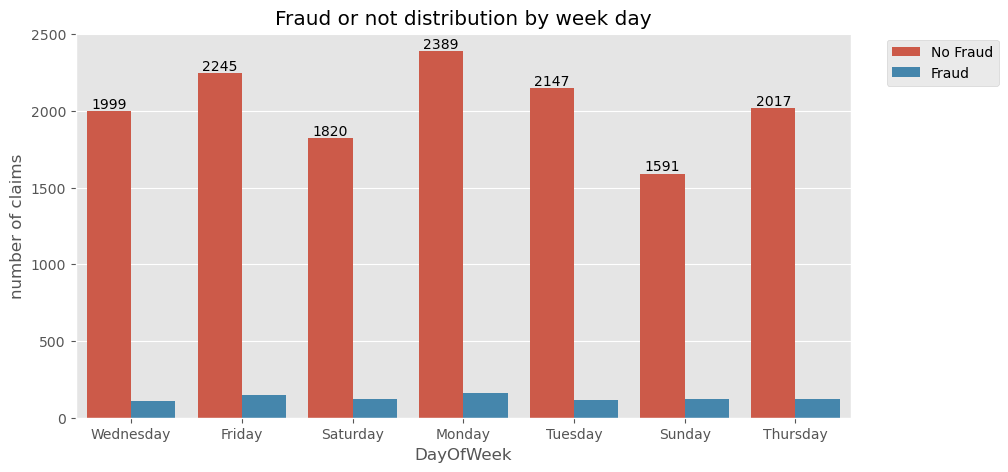

In [61]:
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="DayOfWeek", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by week day')

plt.ylabel('number of claims')
plt.show()

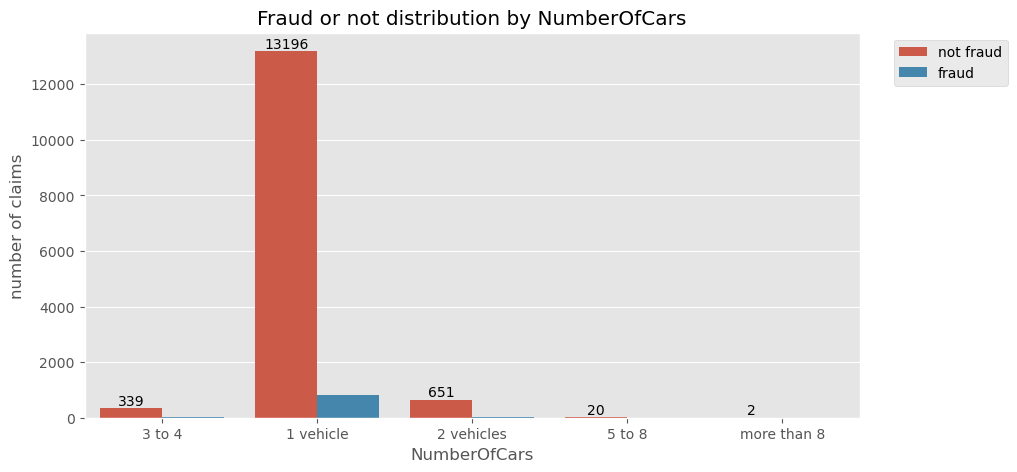

In [74]:
df.groupby(['NumberOfCars','FraudFound_P']).size().reset_index().rename(columns={0:'Num of claims'})
plt.figure(figsize=(10, 5))
fig = sns.countplot(x="NumberOfCars", hue ='FraudFound_P', data=df)
fig.bar_label(fig.containers[0]);
plt.legend(['not fraud', 'fraud'], bbox_to_anchor=(1.2, 1))
plt.title('Fraud or not distribution by NumberOfCars')

plt.ylabel('number of claims')
plt.show()

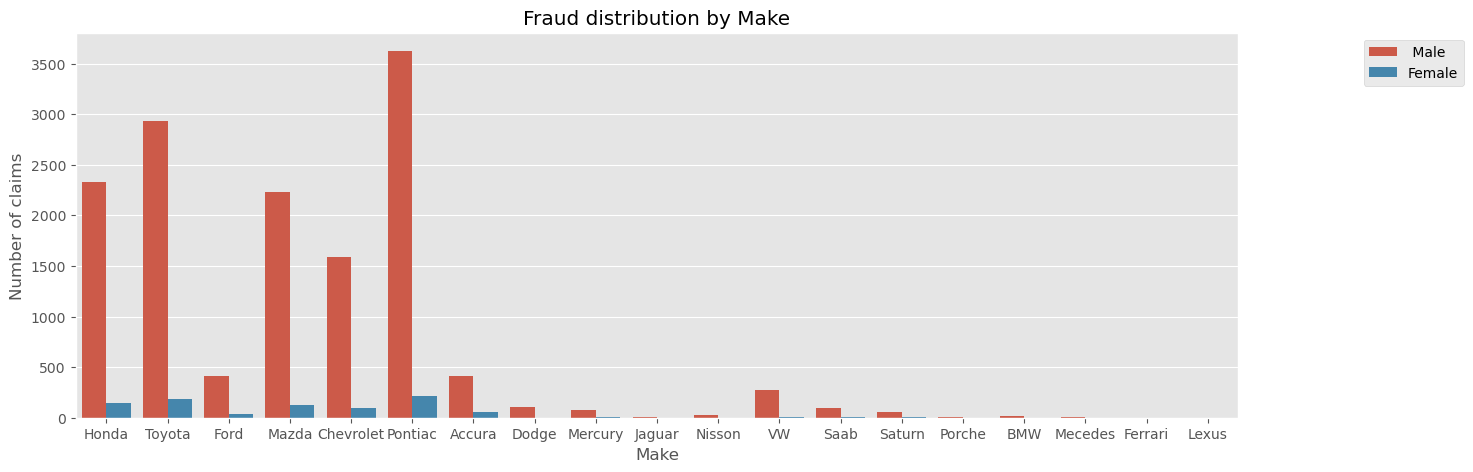

In [73]:
plt.figure(figsize=(15, 5))
sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.title('Fraud distribution by Make')
plt.xlabel('Make')
plt.ylabel('Number of claims')
plt.show()

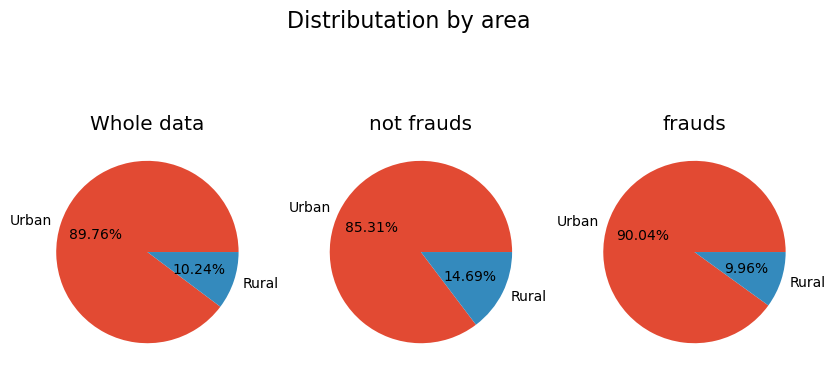

In [63]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
Accident_area_1 = df.AccidentArea.value_counts().values
Accident_area_2 = df_fraud1.AccidentArea.value_counts().values
Accident_area_3 = df_no_fraud.AccidentArea.value_counts().values
labels = ['Urban','Rural']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].pie(Accident_area_1, labels = labels, autopct = '%1.2f%%')
ax[0].set_title('Whole data')

ax[1].pie(Accident_area_2, labels = labels, autopct = '%1.2f%%')
ax[1].set_title('not frauds')

ax[2].pie(Accident_area_3, labels = labels, autopct = '%1.2f%%')
ax[2].set_title('frauds')

fig.suptitle('Distributation by area', fontsize=16)
plt.show()


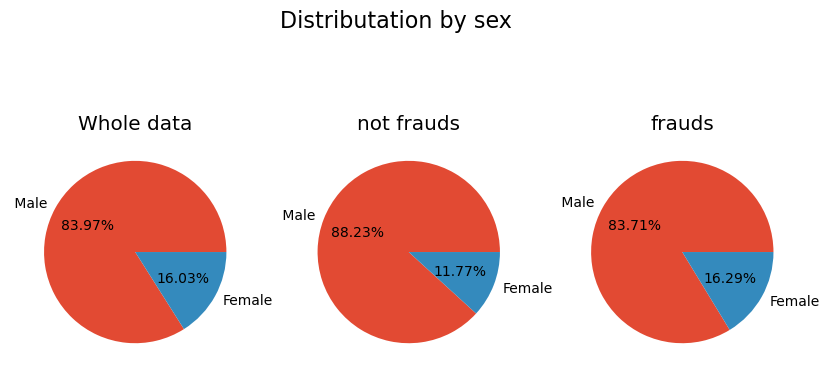

In [64]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
area_1 = df.Sex.value_counts().values
area_2 = df_fraud1.Sex.value_counts().values
area_3 = df_no_fraud.Sex.value_counts().values
labels = [' Male','Female']

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].pie(area_1, labels = labels, autopct = '%1.2f%%')
ax[0].set_title('Whole data')

ax[1].pie(area_2, labels = labels, autopct = '%1.2f%%')
ax[1].set_title('not frauds')

ax[2].pie(area_3, labels = labels, autopct = '%1.2f%%')
ax[2].set_title('frauds')

fig.suptitle('Distributation by sex', fontsize=16)
plt.show()


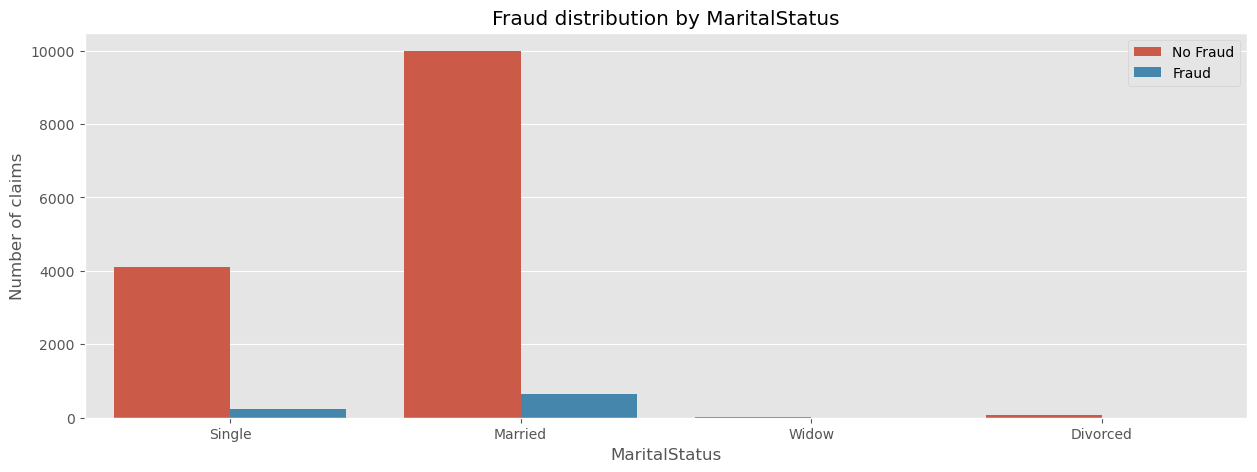

In [65]:
plt.figure(figsize=(15, 5))
sns.countplot(x="MaritalStatus" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Number of claims')
plt.show()

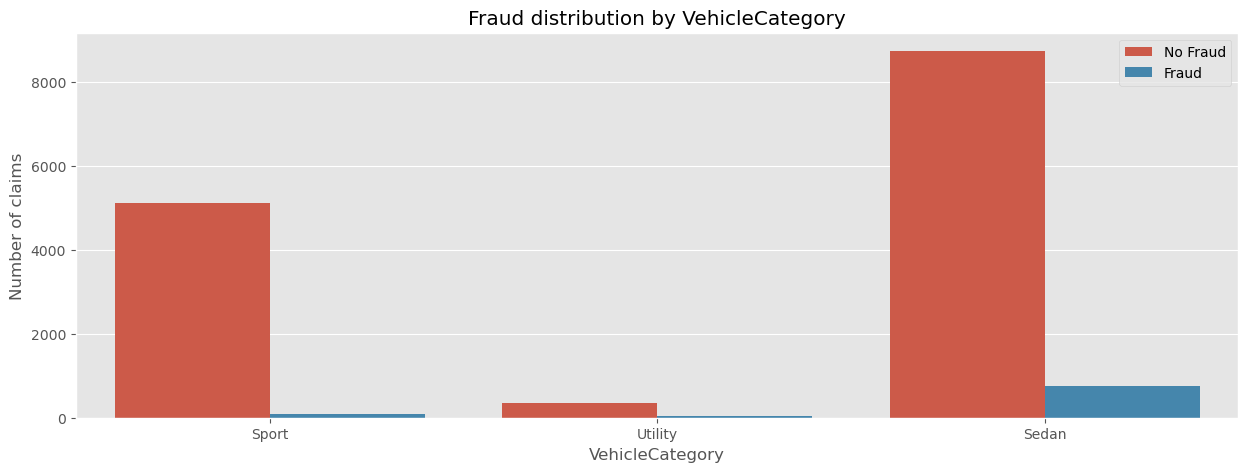

In [66]:
plt.figure(figsize=(15, 5))
sns.countplot(x="VehicleCategory" , hue = 'FraudFound_P', data= df)
plt.legend(["No Fraud", "Fraud"])
plt.title('Fraud distribution by VehicleCategory')
plt.xlabel('VehicleCategory')
plt.ylabel('Number of claims')
plt.show()

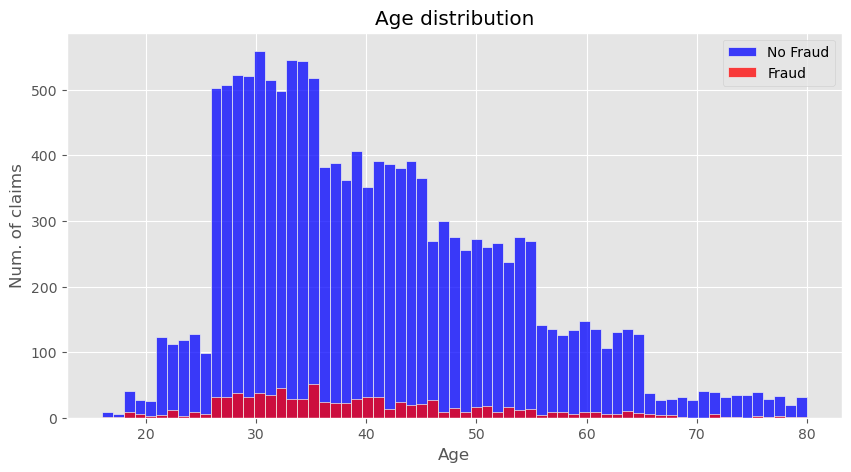

In [67]:
df_fraud1 = df.loc[df['FraudFound_P'] == 1]
df_no_fraud = df.loc[df['FraudFound_P'] == 0]
plt.figure(figsize=(10,5))
sns.histplot(data = df_no_fraud, x = 'Age', color = 'blue', bins = 65)
sns.histplot(data = df_fraud1, x = 'Age', color = 'red', bins = 65)
plt.title('Age distribution')
plt.legend(["No Fraud", "Fraud"])
plt.ylabel("Num. of claims")
plt.show()

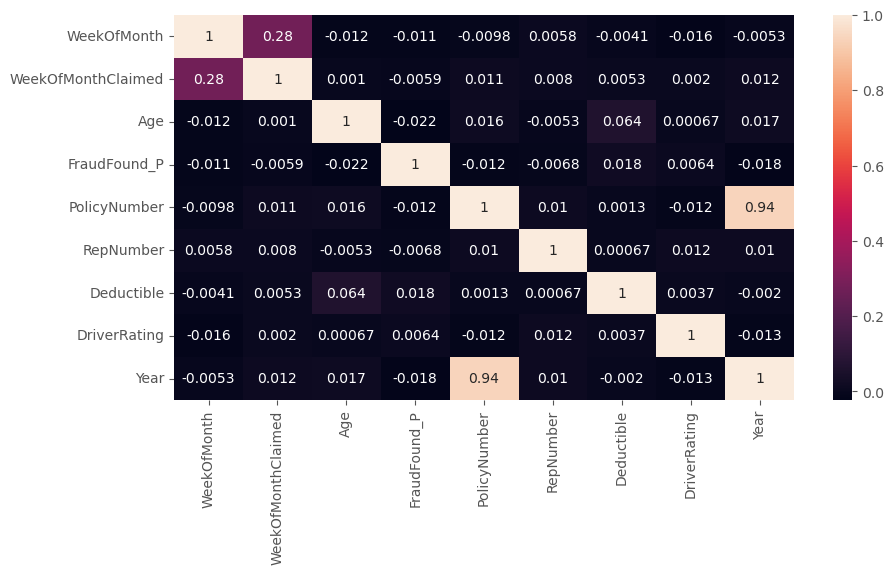

In [70]:
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.show()